In [113]:
import time
import numpy as np
import time
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.datasets import make_blobs
import random
import networkx as nx
from sklearn import cluster, datasets, mixture

In [114]:
def init_centroids(k, data):
    centroids = []
    i = 0
    while i < k:
        centroid = random.choice(data)
        centroids.append(centroid)
        i+=1
    return centroids

def distance(X, Y):
    #X and Y are both arrays
    dist = np.square(np.sum((X-Y)**2))
    return dist

In [115]:
def ndarray_to_list(X):

    i=0
    data = []
    while i < 300:
        data.append((X[i,0],X[i,1]))
        i+=1   
    return data

In [116]:
def big_square_tuples_list(n):
    
    tuples = []
    for i in range (n):
        a = random.randrange(0, 1000)
        b = random.randrange(0, 1000)
        tuples.append((a,b))
        
    return tuples
    
def random_tuple_groups_list(nodes, groups):
    
    tuples = []
    for j in range(0,groups):
        for i in range(int(nodes/groups)):
            a = random.randrange(j*groups*100 -350,j*groups*100)
            b = random.randrange(j*groups*100 -350,j*groups*100)
            tuples.append((a,b))
            
    return tuples
            
def circle_in_circle_tuples_list(nodes):
    tuples = []
    
    X, Y = datasets.make_circles(
    n_samples=nodes, factor=0.5, noise=0.05, random_state=30
    )
    
    
    for x in X:
        x[0] = x[0]*750
        x[1] = x[1]*750
        tuples.append((x[0],x[1]))
    return tuples

def double_horseshoes_tuples_list(nodes):
    tuples = []
    
    X,Y = datasets.make_moons(
    n_samples=nodes, noise=0.05, random_state=30
    )
    
    for x in X:
        x[0] = x[0]*750
        x[1] = x[1]*750
        tuples.append((x[0],x[1]))
        
    return tuples
        
    
def lines_tuples_list(nodes):
    points = []
    
    for i in range(0,nodes,10):
        points.append((i,i))
        points.append((i+100,i-100))
        points.append((i+200, i-200))
        points.append((i+300, i-300))
        points.append((i+400, i-400))
        
    return points


In [117]:
#assume that i already have (x, y) point things
#fuck the data type ndarray and fuck the packages
#we have a list of n number of tuple points
#we store a list of length n for the centroid assignment based on euclidean distance from centroids
#we store a list of k centroids that gets updated based on the mean distance to all of the points in its cluster

In [118]:
def get_dist(pair):
    return pair[0]

def mean_tuple(tuple_list):
    
    avg_x = sum(map(lambda x: x[0], tuple_list)) / len(tuple_list)
    avg_y = sum(map(lambda x: x[1], tuple_list)) / len(tuple_list)
    res = (avg_x, avg_y)
    return res
    
def create_cluster_lists(k):
    i = 0
    clustersclusters = []
    while i < k:
        cluster = []
        clustersclusters.append(cluster)
        i += 1
    return clustersclusters

def random_list_of_points_generator(n_tuples, val_limit):
    our_list = []
    for x in range(n_tuples):
        r1 = random.randint(1,val_limit)
        r2 = random.randint(1,val_limit)
        point = (r1, r2)
        our_list.append(point)
    return our_list

def visualize_clusters(c_lists):
    
    x = [None]*len(c_lists)
    y = [None]*len(c_lists)
    
    for i in range(len(c_lists)):
        
        xv = []
        yv = []
        
        for j in range(len(c_lists[i])):     
            
            xv.append(c_lists[i][j][0])
            yv.append(c_lists[i][j][1])
            
        x[i] = xv
        y[i] = yv
        
        plt.scatter(xv,yv)
    
    plt.show()
    
    #print(x)
    return x
        
    

In [119]:
from random import randint
import math

def k_means_v1(point_list, k):
    #need to randomly assign he centroids at the beginning
    #out point_list is like [(x1,y1), (x2,y2), ... (xn,yn)]
    centroids = []
    centroids += random.sample(point_list, k)
    
    #ok i have some centroids now
    #we need to make a list called assignments for assigned cluster for each point
    #each index represents the same index point in point_list i.e. [...(x4,y4)...] will have assignment at asn[3].
    lst = [None]*(len(point_list))
    
    #i think here is where we do a while loop a couple times to assign/reassign clusters and centroids so... here goes
    iterations = 0
    start_time = time.time()
    while iterations < 10:

        #kk that list is now a thing
        #use euclidean distance to calculate distance from each point to each centroid
        for i in range(len(point_list)):
            point = point_list[i]
            point_dists = []
            label = 0
            
            for centroid in centroids:

                a = point[0]-centroid[0]
                b = point[1]-centroid[1]
                sum = a**2 + b**2
                dist = math.sqrt(sum)
                point_dists.append((dist, label))
                label += 1

            sorted_by_distance = sorted(point_dists, key = get_dist)
            #now we have a list of length k where the shortest distance is at the 0th index, with label of k closest centroid
            #need to assign the point to the appropriate centroid in lst
            lst[i] = sorted_by_distance[0][1]
        #cool so all of the points are now assigned to an initial cluster
        #now we need to calculate the mean distance between all the points in our clusters and update the centroid to be that new point
        #keep doing all this a certain number of times for now (eventually until the distance between old_c and new_c becomes very small i.e. convergent)
        cluster_lists = create_cluster_lists(k)
        lmao = k
        lamo = 0
        #need a loopdeeloop to assign points to their clusters for mean analysis based on lst value of index
        for i in lst:
            cluster_lists[i].append(point_list[lamo])
            lamo += 1

        if iterations == 9:
            visualize_clusters(cluster_lists)
            
        for x in range(k):
            centroids[x] = mean_tuple(cluster_lists[x])

        #print(centroids)
        iterations += 1
    
    end_time = time.time()
    run_time = end_time - start_time
    print(run_time)
    return cluster_lists

In [120]:
new_list = random_tuple_groups_list(1000, 4)
new_list2 = big_square_tuples_list(1000)
new_list3 = circle_in_circle_tuples_list(1000)
new_list4 = double_horseshoes_tuples_list(1000)
new_list5 = lines_tuples_list(1000)

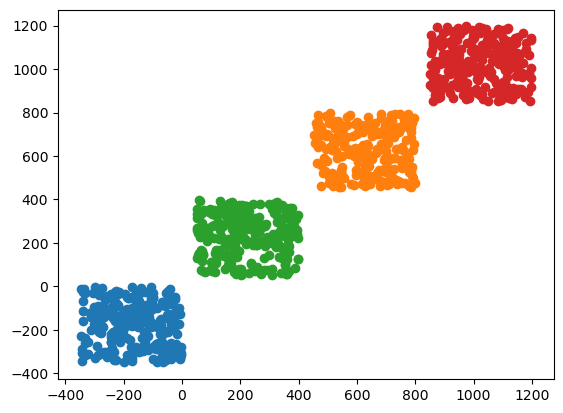

0.502485990524292


In [122]:
k_means_v1(new_list, 4)
#k_means_v1(new_list2, 4)
#k_means_v1(new_list3, 2)
#k_means_v1(new_list4, 2)
#k_means_v1(new_list5, 5)


K-means ran in 0.5 seconds on this graph of 4 clusters (k=4) and made very accurate clusters. This is one of the two ideal scenarios for k-means, but it can take multiple attempts to get one centroid assigned to each blob.

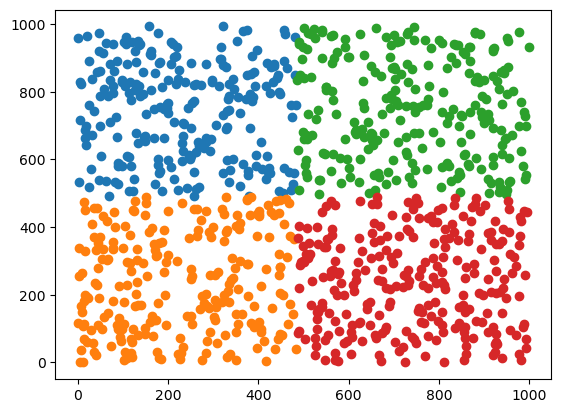

0.40152502059936523


In [123]:
k_means_v1(new_list2, 4)

K-means ran in 0.4 seconds on this graph of random point with x and y values between 0 and 100. This is the second ideal scenario for k-means in which there is a large blob of points and we assign k many clusters to it. In this case we assigned 4 clusters and it symmetrically produced 4 quarters of the graph. 

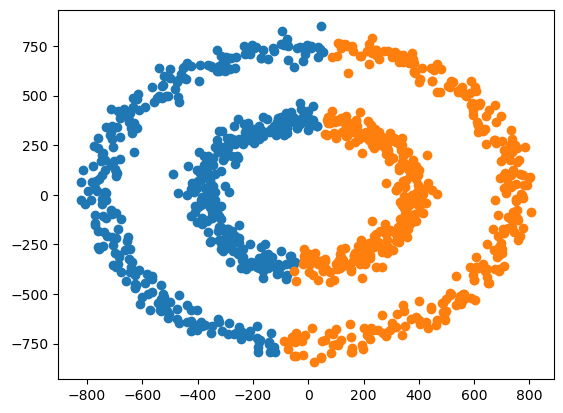

0.5151705741882324


In [124]:
k_means_v1(new_list3, 2)

K-means took 0.515 seconds to run on this circle-within-circle graph with 2 desired clusters. As observed in all experiments on this type of graph, it produces symmetrical clusters about an axis cutting the circles in half. This is not ideal for k-means as it produces clusters that are not very accurate. Even though the points in the middle circle are closer to one another, they are split up into different clusters. Other algorithms would cluster this type of graph as 1 cluster being the inner circle and the other being the outer circle.

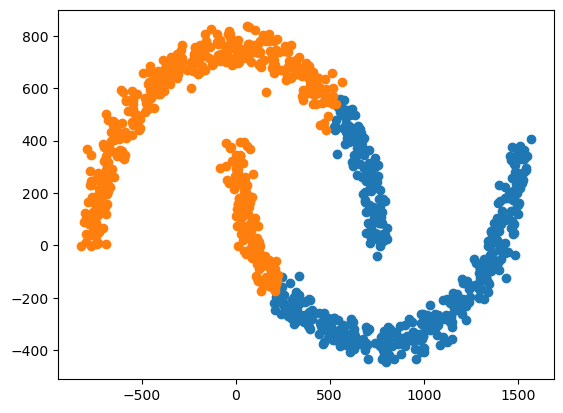

0.3515646457672119


In [125]:
k_means_v1(new_list4, 2)

K-means took 0.351 seconds to run on this double-moon graph. Again, this is not an ideal scenario for k-means and it produces 2 weird yet symmetrical clusters. Other algorithms would be more accurate in clustering each moon as one cluster. All experiements on this type of graph produced similar results.

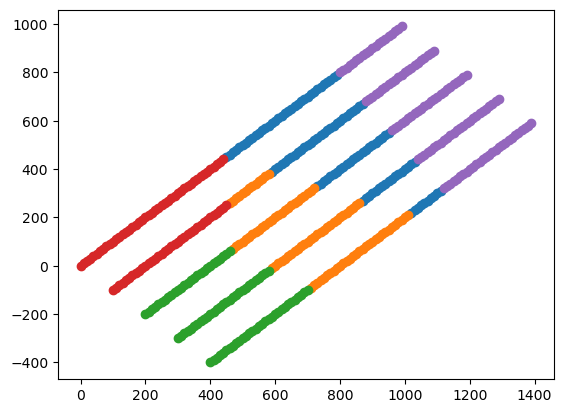

0.46022701263427734


In [139]:
k_means_v1(new_list5, 5)

K-means took 0.46 seconds to run on this group of 5 lines with 5 desired clusters. As can be observed, the clusters are highly inaccurate and through multiple experiments there is high variability in results. There will never be an instance where all 5 lines are clusters because the lines are closer together than half of their lengths.